# Introduction 


Goal:
ist ja wohl klar...

## Zusammenfassung der Contents:
- Monombasis Interpolation + Auswertungsschema
- Newton-Basis und dividierte Differenzen + Auswertung
- Lagrange Polynome + Baryzentrische Interpolationsformeln
- Wahl der Stützstellen hat enormen Einfluss(Runge Phänomen)!!!
- Chebyshev Interpolation + chebyshev Knoten/Abszissen (effizientere Berechnungen dieser Interpolation unter TrigInt)

Runge Funktion mit Chebyshev knoten und abszissen interpolieren
und evtl die Chebyshev interpolation?

# Interpolation mit Auswertung


## Monomen Basis Vandermonde Matrix
### Basis
Für sample Grösse n + 1 haben wir polynomgrad n was wie folgt aussieht:
$$p_n(x) = \alpha_nx^n + ... + \alpha_1x^1+\alpha_0$$
also haben wir einen n+1 dimensionalen Raum mit Basis
$$B = \{ x^n , x^{n-1} , ... , x^1 , x^0 \} $$ 

Sehr leicht lässt sich daher ein lineares Gleichungssystem aufstellen, welches wir folgend Aufstellen
### Vandermonde Matrix
Für n+1 Unbekannte brauchen wir n+1 Gleichungen.
Gegeben sind $x_i$ und $f(x_i) = y_i$   
(Bemerke, dass wir f nicht unbedingt wissen sondern wir Messwerte zur Verfügung haben können)

Wir erhalten 
$$\begin{aligned}
p(x_0) &= \alpha_n(x_0)^n + \alpha_{n-1}(x_0)^{n-1} \cdots \alpha_0 \\
p(x_1) &= \alpha_n(x_1)^n + \alpha_{n-1}(x_1)^{n-1} \cdots \alpha_0\\
&\vdots\\
p(x_n) &= \alpha_n(x_n)^n + \alpha_{n-1}(x_n)^{n-1} \cdots \alpha_0 
\end{aligned}
$$

Wodurch natürlich die Darstellung mit Ax=b erscheint wie folgt:

$$
\begin{bmatrix}
1&x_0&\cdots&x_0^n\\
1&x_0&\cdots&x_0^n\\
\vdots&\vdots&\ddots&\vdots\\
1&x_0&\cdots&x_n^n
\end{bmatrix}
\begin{bmatrix}
\alpha_0\\
\alpha_1\\
\vdots\\
\alpha_n
\end{bmatrix}=
\begin{bmatrix}
y_0\\
y_1\\
\vdots\\
y_n
\end{bmatrix}
$$

Falls wir diese Methode verwenden wollen, möchten wir die Matrix schnell aufstellen.


In [ ]:
#Konstruktion der Vandermonde Matrix
import numpy as np
import time

def mytimeit(rep=1): # decorator with argument
    def mytimeit_real_decorator(func): # actual decorator
        def wrapper(*args, **kwargs):
            ts = [] # measured times
            for k in range(rep):
                start = time.perf_counter()
                #start = time.process_time()
                result = func(*args, **kwargs)
                #end = time.process_time()
                end = time.perf_counter()
                ts.append(end - start)
            print(f'Min. Time taken: {min(ts):.6f} seconds in ',func.__name__)
            wrapper.ats.append(min(ts)) # record the minimal measured time
            return result
        wrapper.ats = [] # declare atribute to use later
        return wrapper   
    return mytimeit_real_decorator

nrEXP = 4

m = 1000; n = 1000
t = np.linspace(0,1,m)
Z = np.ones((m,n)) # Vandermonde Matrix
Z1 = Z.copy()

@mytimeit(rep=nrEXP)
def dirZ(Z):
    for k in range(1,n): Z[k] = Z[k-1]*t
    Z = Z.T
    return Z

@mytimeit(rep=nrEXP)
def indirZ(Z):
    for k in range(1,n): Z[k] = t**k
    Z = Z.T
    return Z

X = dirZ(Z)
Y = indirZ(Z)

print(dirZ.ats)
print(indirZ.ats)

print(np.linalg.cond(X))

### Horner Schema
Wir haben nun die $\alpha_i , i \in \{0,..,n\}$  berechnet  
und wollen für eine Menge von $x \in [a,b]$
Funktionswerte Berechnen. Wir benutzen das Horner schema statt der Formel oben zur  
Berechnung aus(Insert Gründe) 

$$p(x) = (x...x(x(\alpha_nx+\alpha_{n-1})+...+\alpha_1)+\alpha_0).$$


In [ ]:
"""
zwei Implementierungen:
1. Nutze numpy.interpolate und polyval 
2. Nutze custom function aus Code 2.1.15: Horner-Schema
"""
import numpy as np

#nehme an a sei ein array mit den korrekten koeffizienten
a = np.arange(0,10)
#x sind die Auswertungsstellen
x = np.linspace(0,1,100) 
y = np.polyval(a,x)

#Horner Schema aus skript:

def horner(p, x):
    y = p[0]
    for i in range(1, len(p)):
        y = x + p[i]
    return y

#Insert vergleich von beiden mit %%timit

## Newton Basis und Dividierte Differenzen
Ansatz bei der Newton basis ist es ein Polynom zu entwickeln, bei dem man einfach neue Interpolationsbedingungen hinzufügen möchte.

Man kann also einfach von 0. grad zu 1. grad umbauen:

$$p_0(x_0) = y_0 -> p_1(x) = p_0(x) + (x - x_0)\dfrac{y_1 - y_0}{x_1 - x_0}$$

Erklärung des Schemas:
p_n(x) = p_{n-1}(x) + 


Bemerkung:
Diese Polynome sind analytisch die selben, wie bei der Vandermonde matrix.

Explizite Form eines Polynoms durch Newton Basis:
$$p_n(x) = \beta_0N_0(x) + \beta_1N_1(x) + ... + \beta_nN_n(x)$$

$$N_n(x) = \prod_{i=0}^{n-1} (x-x_i)$$
Die Koeffizienten Beta sind also die Unbekannten, welche wir entweder mit einer Matrix berechnung oder durch dividierte Differenzen.
Eigentlich benutzen wir wenn nur dividierte Differenzen:
$$y[x_i] = y_i,  y[x_i,...,x_{i+k}] = \dfrac{y[x_{i+1},...,x_{i+k}]-y[x_i,....,x_{i+k-1}]}{x_{i+k-x_i}}$$
$$
\begin{array}{c|cccc}
x_0 & y[x_0] & & & \\
x_1 & y[x_1] & y[x_0,x_1] & & \\
x_2 & y[x_2] & y[x_1,x_2] & y[x_0,x_1,x_2] & \\
x_3 & y[x_3] & y[x_2,x_3] & y[x_1,x_2,x_3] & y[x_0,x_1,x_2,x_3]
\end{array}
$$

Die Beta werte sind die Werte $y[x_0], y[x_0,x_1], y[x_0,x_1,x_2],...$

Es wär aber genau so legitim die $x_0, x_1, x_2, x_3$ in der Linken Spalte anders anzuordnen

Wenn wir jetzt einen neuen Messpunkt x_4 bekommen impliziert das, dass wir einfach
$$
\begin{array}{c|ccccc}
x_4 & y[x_4] & & & & \\ 
x_0 & y[x_0] & y[x_4,x_0] & & &\\
x_1 & y[x_1] & y[x_0,x_1] & y[x_4,x_0,x_1] & & &\\
x_2 & y[x_2] & y[x_1,x_2] & y[x_0,x_1,x_2] & y[x_4,x_0,x_1,x_2] &\\
x_3 & y[x_3] & y[x_2,x_3] & y[x_1,x_2,x_3] & y[x_0,x_1,x_2,x_3] & y[x_4,x_0,x_1,x_2,x_3]
\end{array}
$$

machen können.

Spezialfall Äquidistante Punkte $x_i$

### Dividierte Differenzen Implementiert:

In [ ]:
#Implementierungen für Berechnung der Beta werte:

#Von Leonard:
import numpy as np
def divdiffLeo(x,y):
    """
    """   
    z = y.copy()
    n = y.shape[0]
    for i in range(1,n):
      z[i:n] = z[i:n] - z[i-1:n-1]
      z[i:n] = z[i:n] /(x[i:n] - x[0:n-i])
    #print(z[0:3])
    return z
#Master Solution:
def divdiff(x,y):
    """
    x = node set (mutually different)
    y = nodal values, will be overwritten: no copy
    Returns the coefficients of the polynomial in Newton basis
    vectorized version: fastest possible
    """   
    n = len(x)
    for j in range(1,n):
        y[j:n] = (y[j:n] - y[j-1:n-1]) /  (x[j:n] - x[:n-j])
    return y


### Auswertung:
Das Horner Schema hier ist:
$$\begin{aligned}
p &= \beta_n \\
p &= (x - x-{n-1})p + \beta_{n-1}\\
\vdots\\
p &= (x - x_0)p + \beta_0\\
\end{aligned}$$

In [ ]:
#Implementierungen Des Horner Schemas:
import numpy as np

#Leonards Solution:
def evalNewtonLeo(x, dd, xx):
    """
    """
    n = x.shape[0]
    r = np.zeros(xx.shape[0]).reshape(-1,1)
    xx = xx.reshape(-1,1)
    r = r + dd[n-1]
    for j in range(n-2, -1, -1):
      r = r * (xx - x[j]) + dd[j]
    return r
    



#Master Solution:
def evalNewton(x, dd, xx):
    """
    Evaluiert das Newton-Polynom

    Input: x  ... Stuetzstellen
           dd ... dividierte Differenzen
           xx ... auswertungspunkte

    Output: yy ... Newton-Polynom ausgewertet an xx
    """
    r = 0*xx + dd[-1] # initialise with the highest coefficient
    n  = len(dd)
    for i in range(n-2,-1,-1): # Horner scheme
        r = r*(xx-x[i]) + dd[i]
    return r

## Lagrange Polynome

## Runge Phänomen

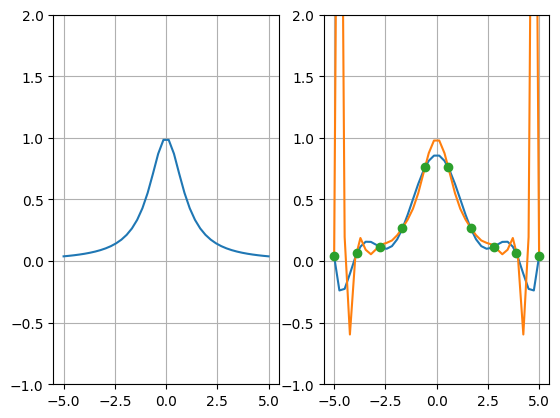

In [3]:
import numpy as np
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt

def runge(x):
    return 1/(1+x**2)
x = np.linspace(-5,5,10)
y = runge(x)
xMore = np.linspace(-5,5,40)
#print(poly)
plt.subplot(1,2,1)
plt.plot(xMore, runge(xMore))
plt.ylim(-1,2)
plt.grid(True)
#plot 2

plt.subplot(1,2,2)
for i in range(10,30,10):
    xMod = np.linspace(-5,5,i)
    yMod = runge(xMod)
    poly = lagrange(xMod,yMod)
    plt.plot(xMore,poly(xMore))
#Interpolations using equidistant and 
plt.ylim(-1,2)
plt.grid(True)
plt.plot(x,y, 'o')
plt.show()

    





## Baryzentrische Interpolation mit Chebyshev

In [ ]:
#Implementierung Baryzentrische Gewichte Berechnen:
def barycentric_weightsLeo(x):
    """
    """
    n = len(x)
    barweight = np.zeros(n)
    for i in range(n):
      prod = 1
      for j, point in enumerate(x):
        if(i == j):
          continue
        prod *= (x[i] - x[j])
      barweight[i] = 1/prod
    return barweight

#Master Solution
def barycentric_weights(x):
    """
    Berechne die baryzentrischen Gewichte zu den Stuetzstellen x

    Input: x ... Stuetzstellen
    Output: barweight ... baryzentrischen Gewichte
    """
    n = len(x)
    barweight = np.ones(n)
    for k in range(n):
        barweight[k] = 1.0 / (np.prod(x[k] - x[:k]) * np.prod(x[k] - x[k+1:]) )

    return barweight


In [ ]:
#Auswertung des Baryzentrischen Polynoms:
import numpy as np
def interp_barycentricLeo(x, y, barweight, xx):
  """
  """
  pxx = np.zeros_like(xx)b
  print(len(x), len(y), len(barweight), len(xx))
  for i, point in enumerate(xx):
    if xx[i] in x:
      ind = np.where(x == xx[i])[0][0]
      pxx[i] = y[ind]
      continue
    top = 0
    bot = 0
    for j in range(len(x)):
      sub = barweight[j]/(xx[i] - x[j])
      bot += sub
      top += sub*y[j]
    pxx[i] = top/bot
  return pxx

#Master Solution
def interp_barycentric(x, y, barweight, xx):
  """
  Purpose: berechnet das Interpolations-Polynom p(xx) mittels
           baryzentrischer Interpolationsformel mit Stueztstellen x,
           Stuetzwerten y und Gewichte barweight

  Input: x         ... Stuetzstellen
         y         ... Stuetzwerte
         barweight ... baryzentrische Gewichte zu x
         xx        ... xx

  Output: pxx ... Interpolationspolynom ausgewertet an xx
  """
  pxx = np.zeros_like(xx) # oder pxx = 0.*xx

  for i, xxi in enumerate(xx): #  sequenziel :(
    z = xxi - x
    j = z == 0
    if np.any(j):
            pxx[i] = y[j][0]
    else:
            mu = barweight / z
            pxx[i] = np.dot(mu, y) / np.sum(mu)
  return pxx



## Chebychev Interpolation
- Gibt uns die Chebyshev Polynome(wichtig!)
- Schnelle und akkurate PolynomInterpolation

Definition der Chebyshev Polynome:

In [ ]:
#Clenshaw Interpolation by Leonard Marks(maybe not best due to memory usage, update later)
import numpy as np

#Leonards Solution
def clenshawLeo(a,x):
  # TODO: implementiere hier Clenshaw
  #start computing the values of d starting at d_n and moving backwards
  M = np.zeros((len(x),len(a)+1,))
  #Row j of M compute holds the n values of d_k for d_0 until d_1 
  M[:,-2] = a[-1]
  #Initialized the nth column of M with c_n as d_n = c_n via the recursive relation of d_k
  for i in range(len(a)-2, -1, -1):
    #Notice that M[:,i] is the ith column of the Matrix M
    M[:,i] = a[i]+2*x*M[:,i+1] - M[:,i+2]
    #simply applied the recursive formula for d_i
  y = np.ravel(M[:,0]-x*M[:,1])
  #flatten out the result of d_0 - x*d_1
  return y

#Master Solution
def clenshaw(a,x):
    # degree of polynomial
    n = len(a) - 1
    # initialise temporary variables
    dkp2, dkp1, dk = np.zeros_like(x), np.zeros_like(x), np.zeros_like(x)
    
    for k in range(n, -1, -1): # backward recursion
        dk = a[k] + 2*x*dkp1 - dkp2
        dkp2, dkp1 = dkp1, dk

    y =  dkp1 - x*dkp2
    return y

# Zusammengefasster Vergleich

vergleiche [lagrange](#Lagrange-Polynome)

# Fehleranalyse